In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rd


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Function to read data from file
def get_data(din):
    bf = pd.read_csv(din,sep='\t')
    genes = bf['Hugo_Symbol']
    cols = list(bf.columns)
    cols.remove('Entrez_Gene_Id')
    cols.remove('Hugo_Symbol')
    bf = bf[cols]
    bf = bf.transpose()
    bf.columns = genes
    return bf

def getDataset(din1, din2, din3):
    normal1 = get_data(din1)
    normal2 = get_data(din2)
    abnormal = get_data(din3)
    common_gene = set(list(normal1.columns)).intersection(set(list(normal2.columns))).intersection(set(list(abnormal.columns)))
    common_gene = list(common_gene)
    normal1 = normal1[common_gene]
    normal2 = normal2[common_gene]
    abnormal = abnormal[common_gene]
    #abnormal = list(abnormal)
    
    X_train = pd.concat( [normal1, normal2] )#.values
    
    #abnormal = abnormal.values.tolist()
    #normal1 = normal1.values.tolist()
    
    #abnormal = list(np.float_(abnormal))
    #normal1 = list(np.float_(normal1))
    
    #abnormal = rd.SystemRandom().sample(abnormal, 25)
    #normal1 = rd.SystemRandom().sample(normal1, 65)
    
    #abnormal = pd.DataFrame(abnormal)
    #normal1 = pd.DataFrame(normal1)
    
    #X_train = np.random.shuffle(X_train) 
    X_test = pd.concat( [normal1, abnormal] )#.values
    #y_test = np.zeros(len(X_test), dtype=int)
    #y_test[len(normal1):] = 1
    

    
    #X_train = np.asarray(X_train)
    #X_test = np.asarray(X_test)
    #y_test = np.asarray(y_test)
                

    return X_train, X_test#, y_test

In [3]:
din1 = 'data/stomach-rsem-fpkm-gtex.txt'
din2 = 'data/stad-rsem-fpkm-tcga.txt'
din3 = 'data/stad-rsem-fpkm-tcga-t.txt'

In [4]:
X_train, X_test = getDataset(din1, din2, din3)

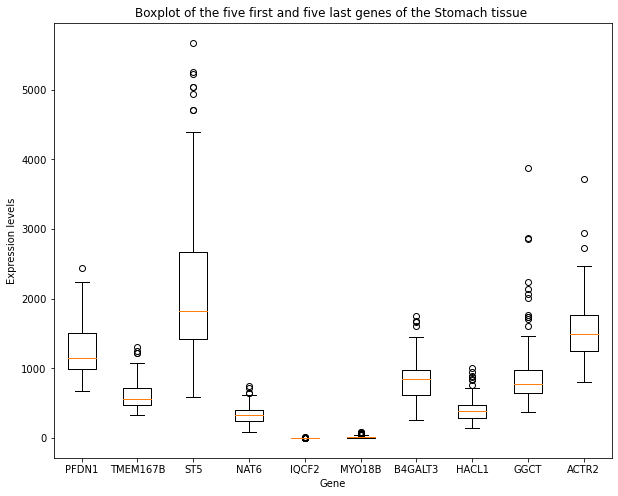

In [6]:
# Sélectionner les cinq premières colonnes et les cinq dernières colonnes
cols = list(X_train.columns[:5]) + list(X_train.columns[-5:])
df_subset = X_train[cols]

# Afficher le boxplot
plt.figure(figsize=(10,8))
plt.boxplot(df_subset.values, labels=df_subset.columns)
plt.title('Boxplot of the five first and five last genes of the Stomach tissue ')
plt.xlabel('Gene')
plt.ylabel('Expression levels')
plt.show()